# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>1 |</span> Understand</b></div> 

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Read the CSV file into a DataFrame
df = pd.read_csv('Fixed Ecommerce.csv')  # Fake data

# Define target attribute and metrics
target_attribute = "Yearly Amount Spent"
metrics = ['Avg. Session Length', 'Time on App', 'Length of Membership']

# Move the target column to the end of the DataFrame
df = df[[col for col in df.columns if col != target_attribute] + [target_attribute]]

# Get a list of columns in the DataFrame
list_of_columns = df.columns.tolist()
print(list_of_columns)

['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']


## <b><span style='color:#1f89e3'> 1.1 |</span> Data Dictionary</b>
Some small snippet explaining what the table is representing.




<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Attribute Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
   <tr>
        <td>Email</td>
        <td>The email address of the customer.</td>
    </tr>
    <tr>
        <td>Address</td>
        <td>The physical address of the customer.</td>
    </tr>
    <tr>
        <td>Avatar</td>
        <td>The customer's avatar or profile picture.</td>
    </tr>
    <tr>
        <td>Avg. Session Length</td>
        <td>The average length of time a customer spends in a session on the website or app.</td>
    </tr>
    <tr>
        <td>Time on App</td>
        <td>The total amount of time (in minutes) a customer spends using the mobile app.</td>
    </tr>
    <tr>
        <td>Time on Website</td>
        <td>The total amount of time (in minutes) a customer spends on the website.</td>
    </tr>
    <tr>
        <td>Length of Membership</td>
        <td>The duration (in years) for which a customer has been a member of the service.</td>
    </tr>
    <tr>
        <td>Yearly Amount Spent</td>
        <td>The total amount of money spent by the customer on a yearly basis.</td>
    </tr>
  </tbody>
</table>

## <b><span style='color:#1f89e3'> 1.2 | </span>Preview Dataframe</b>

In [2]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,4483 Jones Motorway Suite 872\r\nLake Jamiefur...,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\r\nWest Richard, CA ...",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,0787 Andrews Ranch Apt. 633\r\nSouth Chadburgh...,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\r\nBrendachester, ...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


<img src='./Assets/Attributes.png' />

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>2 |</span> Clean</b></div> 

## <b><span style='color:#1f89e3'> 2.1 | </span>Completeness</b>

In [3]:
# Missing data in terms of percentages for each attribute.
threshold = 0

missing = ((df.isnull().sum() / len(df)) * 100).round(2)
filtered = missing[missing > threshold].reset_index()
filtered.columns = ['Attribute', 'Missing Percentage']

# Format and sort the DataFrame
filtered['Missing Percentage'] = filtered['Missing Percentage'].apply(lambda x: f"{x:.2f}%")
empties_df = filtered.sort_values(by='Missing Percentage').style.hide()

# Check if the underlying DataFrame is empty
if len(empties_df.data) == 0:
    print("No empties!")
else:
    empties_df
    sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='plasma')


No empties!


<div class="alert alert-block alert-info">
    <b>No action needed:</b> Nice, No missing data.
</div>

## <b><span style='color:#1f89e3'> 2.2 | </span>Validity</b>
Remove duplicates, address outliers, and check for contextual validity.

In [4]:
duplicates = df[df.duplicated()]

if len(duplicates) == 0:
    print("No duplicates!")
else:
    duplicates

No duplicates!


## <b><span style='color:#1f89e3'> 2.1 | </span>Accuracy</b>

All of the data is in the right format and is contextually accurate.

<div class="alert alert-block alert-success">
    <b>All set:</b> Awesome, the data is all clean!
</div>

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>3 |</span> Analyze</b></div> 
Mastering numpy and pandas will be critical to make attribute engineering easier. 

## <b><span style='color:#1f89e3'> 3.1 | </span>Metrics</b>

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


## <b><span style='color:#1f89e3'> 3.2 | </span>Composition</b>

In [6]:
import plotly.express as px

# Create a list of categorical variables you want to plot
categorical_variables = ['Avatar']

# Loop through each categorical variable and create a treemap
for variable in categorical_variables:
    avg_prices = df.groupby(variable)['Yearly Amount Spent'].mean().reset_index()
    avg_prices = avg_prices.rename(columns={'Yearly Amount Spent': 'Average Yearly Amount Spent'})
    
    # Create the treemap
    fig = px.treemap(avg_prices, path=[variable], values="Average Yearly Amount Spent", title=f'Treemap for {variable}')
    
    # Show the treemap
    fig.show()


## <b><span style='color:#1f89e3'> 3.3 | </span>Distribution</b>

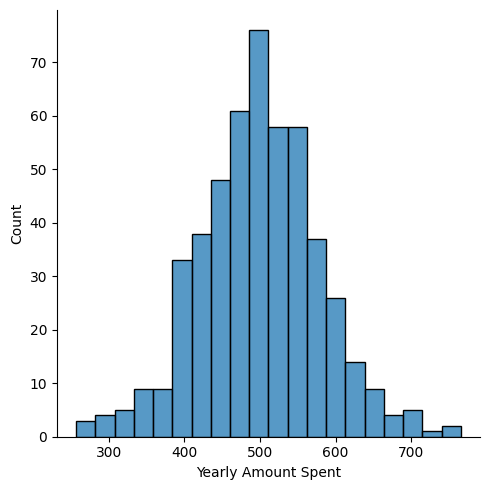

In [7]:
sns.displot(df[target_attribute])

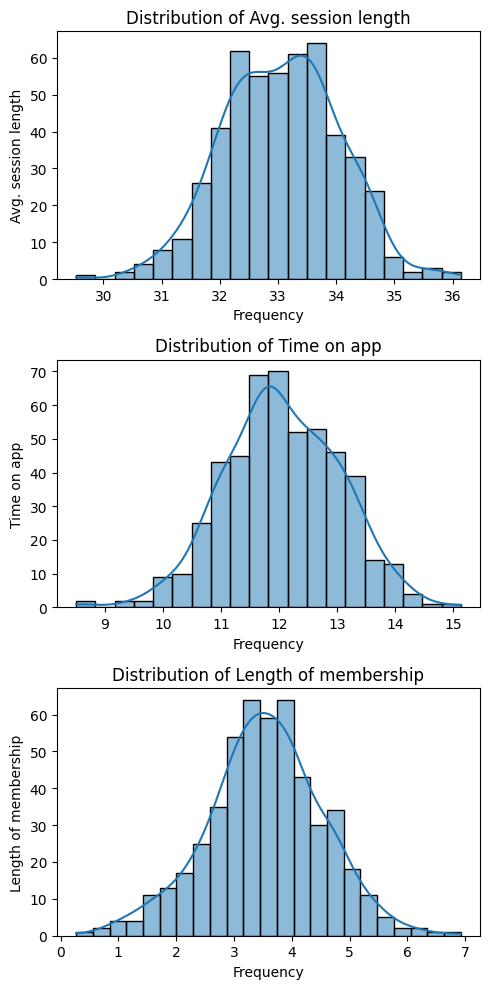

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size

# Create a figure and a grid of subplots with a vertical layout
fig, axes = plt.subplots(len(metrics), 1, figsize=(5, 10))

# Loop through the metrics and create vertical distribution plots
for i, variable in enumerate(metrics):
    sns.histplot(data=df[variable], kde=True, ax=axes[i], orientation='vertical')  # Vertical orientation
    axes[i].set_title(f'Distribution of {variable.capitalize()}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel(variable.capitalize())

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


## <b><span style='color:#1f89e3'> 3.4 | </span>Relationships</b>

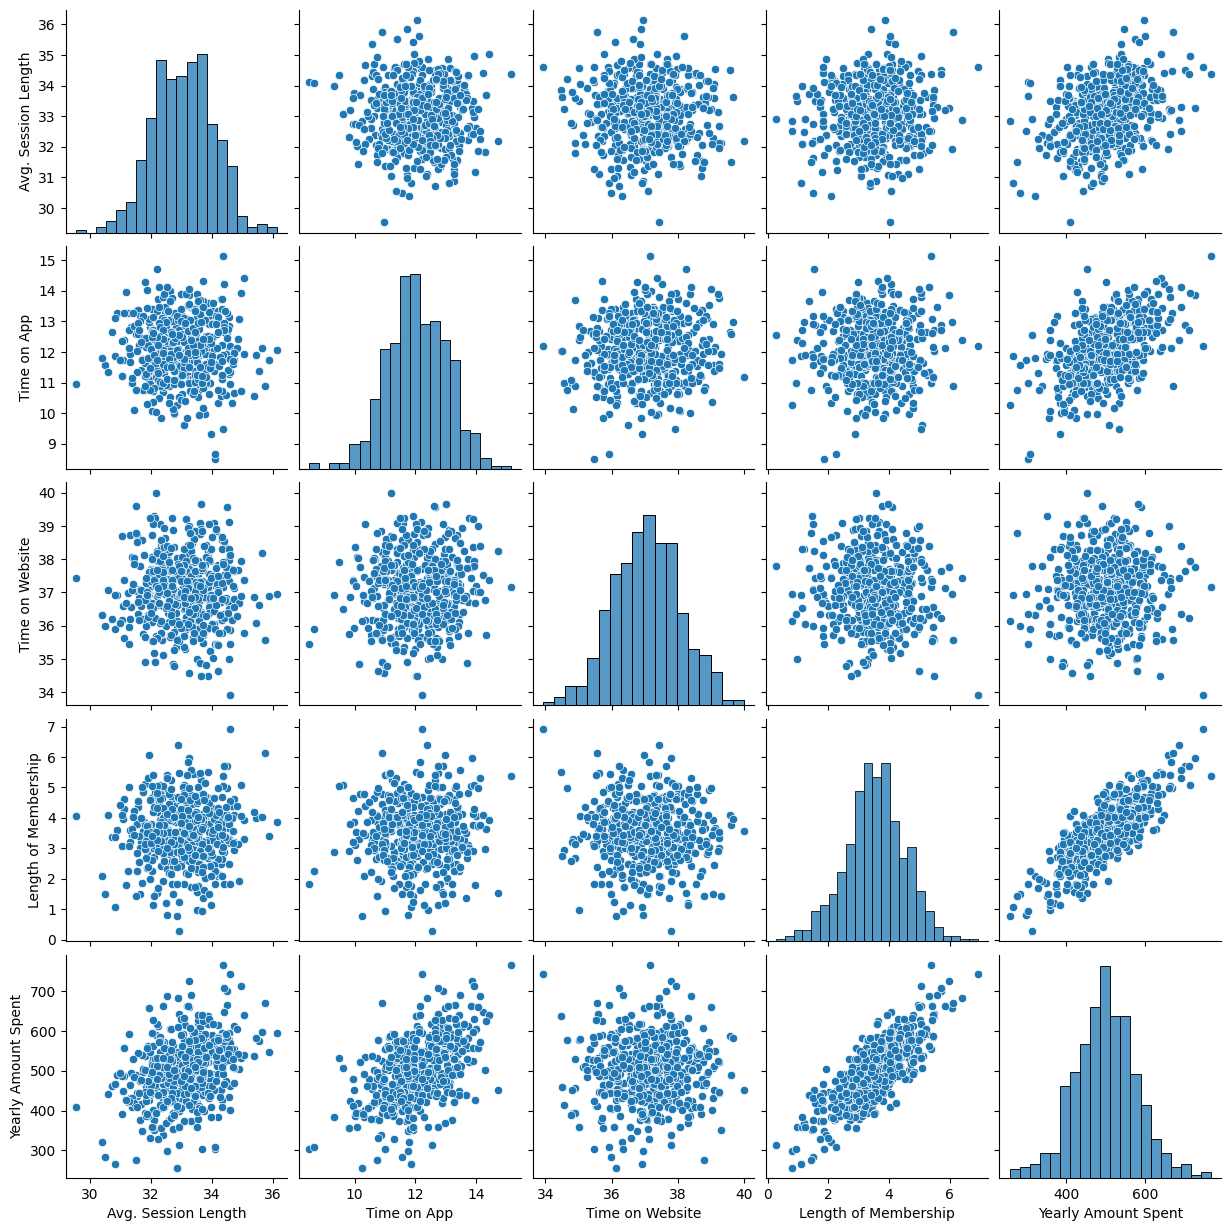

In [9]:
sns.pairplot(df)

<Axes: >

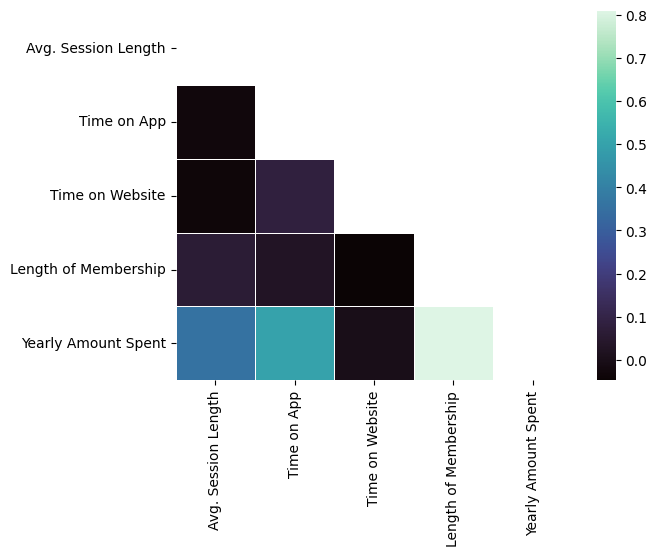

In [10]:
# Create a correlation matrix for numeric columns in the DataFrame
corr_matrix = df.corr(numeric_only=True)

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix))

# Color Options
diverging_cmap = 'coolwarm'
zero_continous_cmap = 'mako'

# Plot a heatmap of the correlation matrix with the mask
sns.heatmap(corr_matrix, linewidths=0.5, mask=mask, cmap=zero_continous_cmap, annot=False)

<Axes: >

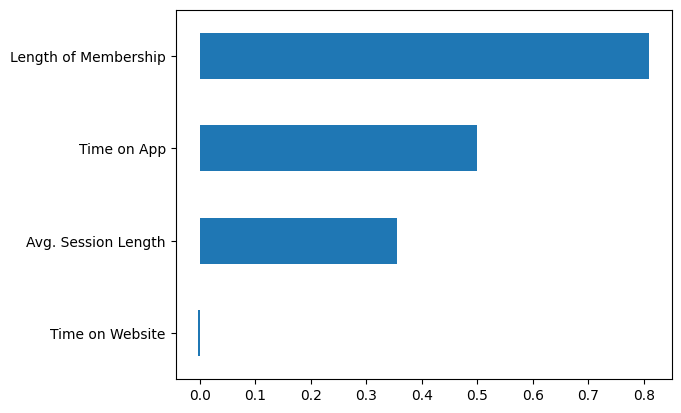

In [11]:
df.corr(numeric_only=True)[target_attribute].sort_values()[:-1].plot(kind='barh')

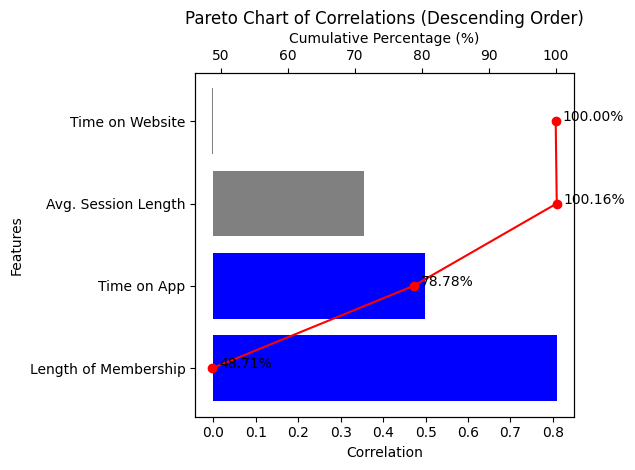

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Calculate correlations
correlations = df.corr(numeric_only=True)[target_attribute].sort_values()[:-1]

# Create a figure with two subplots
fig, ax1 = plt.subplots()

# Sort correlations in descending order and calculate individual percentages
correlations_sorted = correlations.sort_values(ascending=False)
percentage = (correlations_sorted / correlations_sorted.sum() * 100).reset_index()

# Find the index where the cumulative percentage exceeds 80%
index_80_percent = (percentage[target_attribute].cumsum() <= 80).sum()

# Bar chart for the first bars contributing to 80% in blue
ax1.barh(percentage["index"].iloc[:index_80_percent], correlations_sorted.iloc[:index_80_percent], color='blue')

# Bar chart for the remaining bars in gray
ax1.barh(percentage["index"].iloc[index_80_percent:], correlations_sorted.iloc[index_80_percent:], color='gray')

ax1.set_xlabel("Correlation")
ax1.set_ylabel("Features")
ax1.set_title("Pareto Chart of Correlations (Descending Order)")

# Twin the axes to create a second x-axis
ax2 = ax1.twiny()

# Line chart for cumulative percentage
cumulative_percentage = percentage[target_attribute].cumsum()
ax2.plot(cumulative_percentage, percentage["index"], marker='o', color='red')
ax2.set_xlabel("Cumulative Percentage (%)")

# Add labels to each cumulative percentage point
for i, value in enumerate(cumulative_percentage):
    ax2.annotate(f'{value:.2f}%', (value, percentage["index"].iloc[i]), textcoords="offset points", xytext=(5,0), ha='left')

# Show the plot
plt.tight_layout()

plt.show()

<div class="alert alert-block alert-info">
    <b>Good to know:</b> Length of membership and time on app contribute to about 80% of the target attribute. Average session length is important too since there are so few metric attributes. Though it's very interesting to see how the app is so much stronger than the website. 
</div>

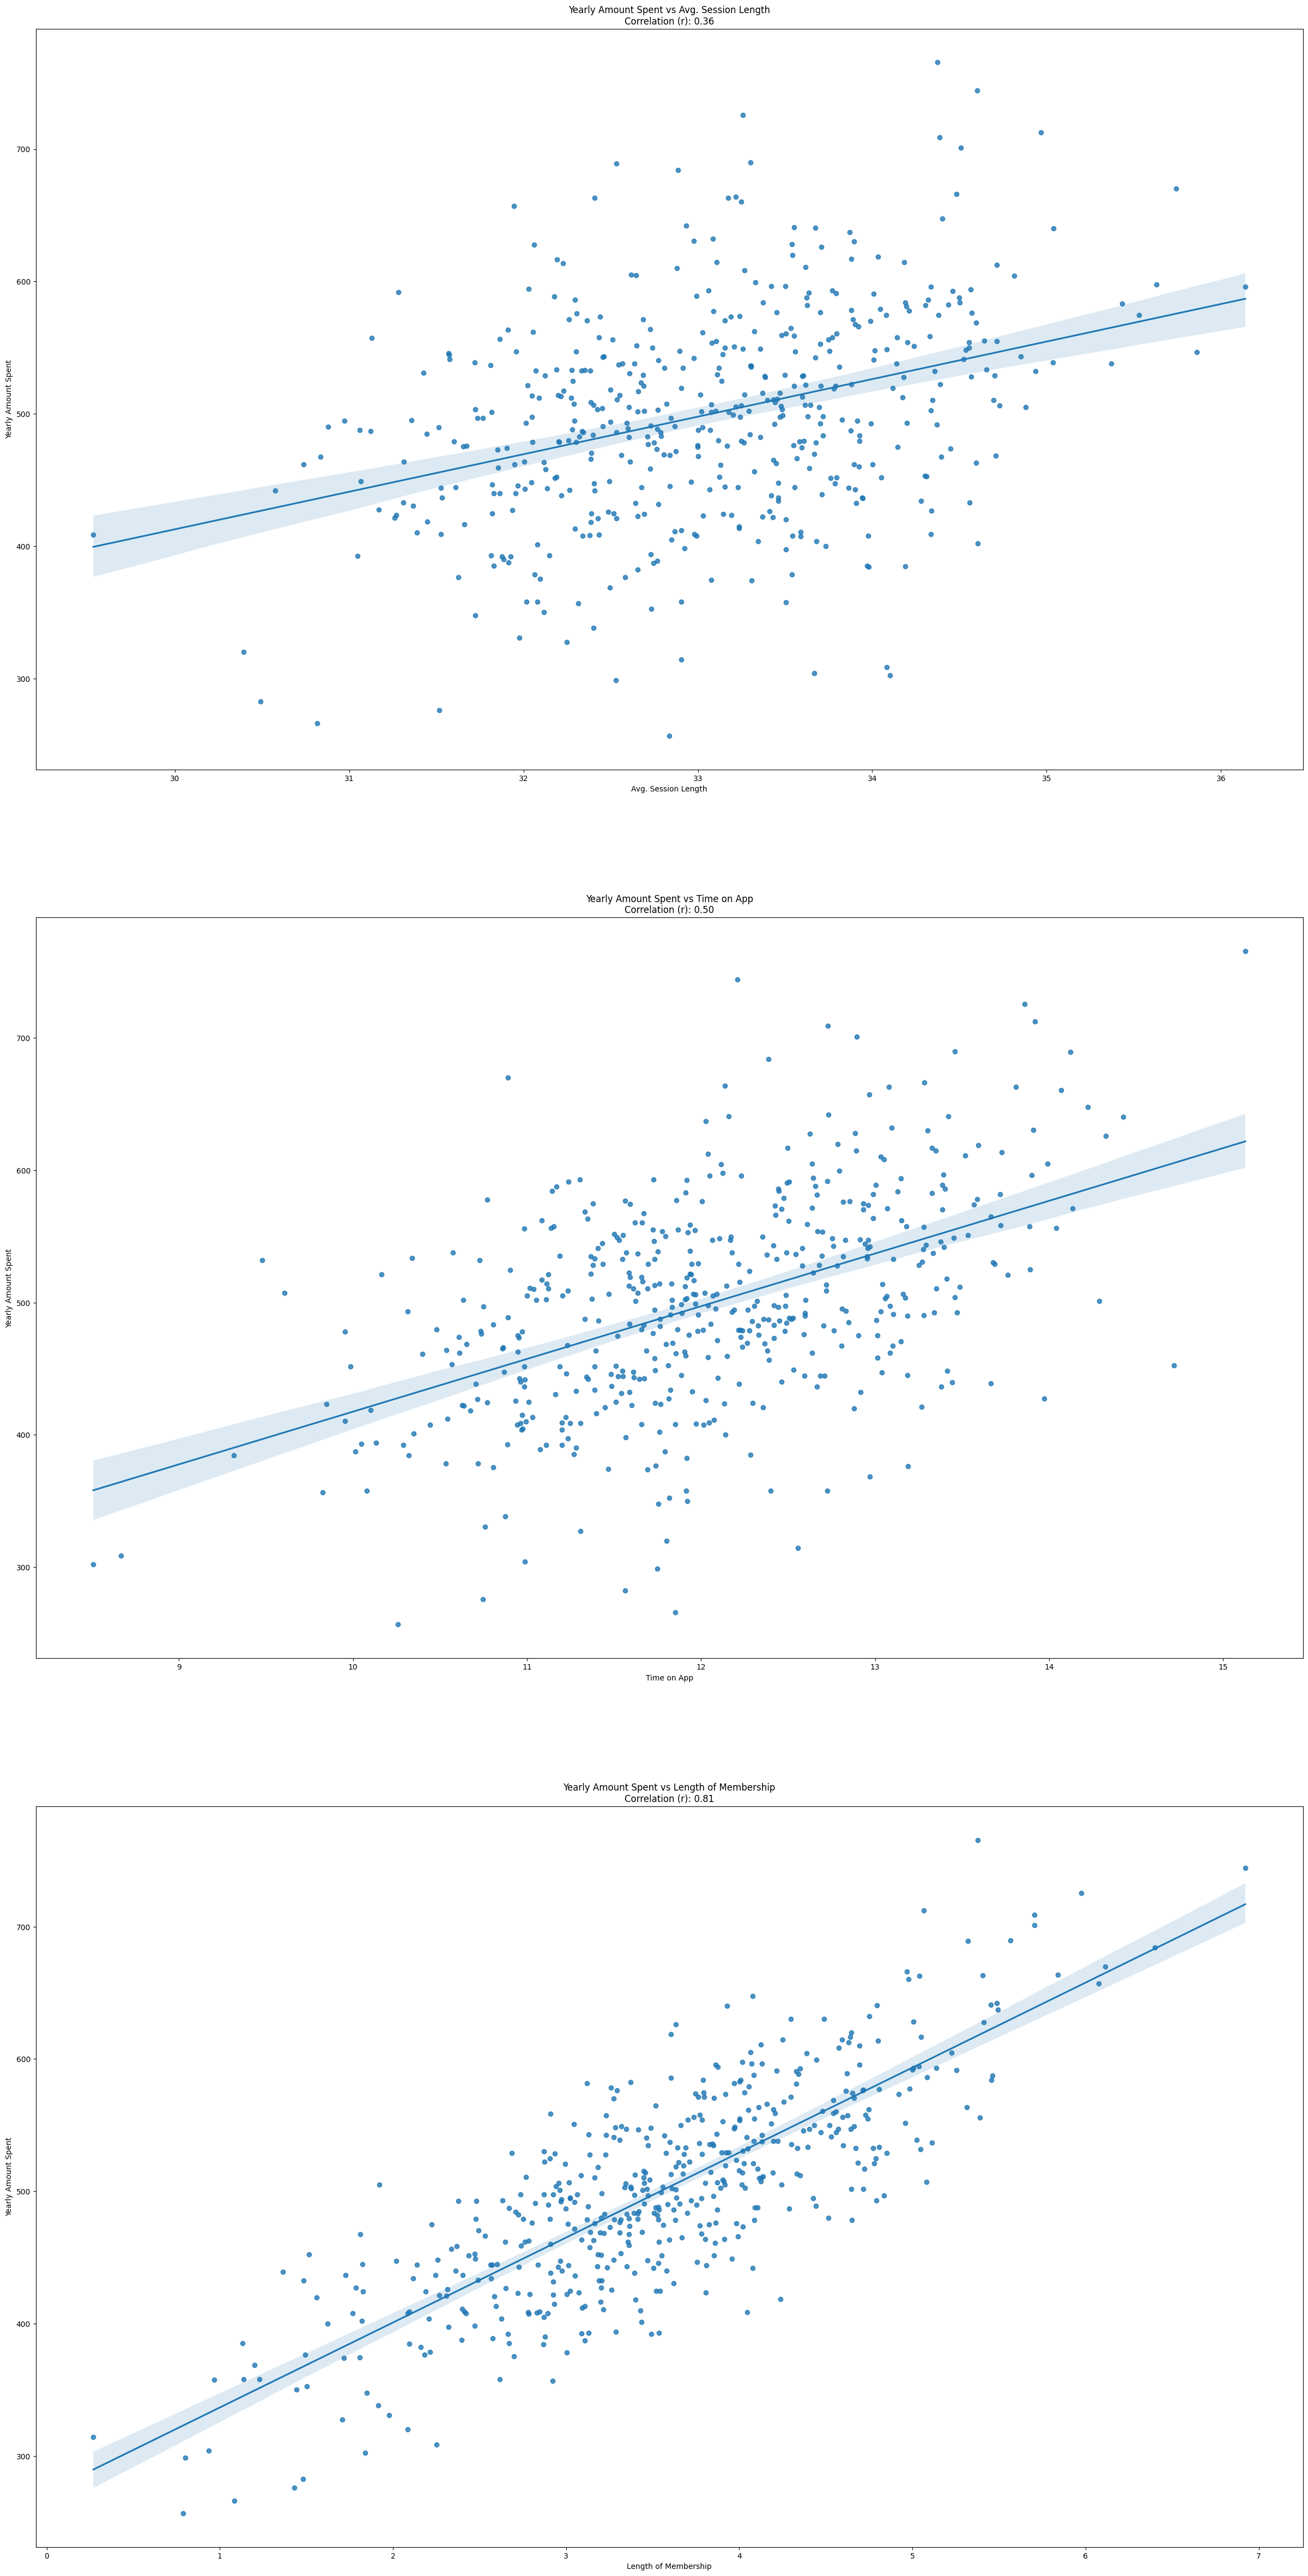

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(30, 60))

# Variables for regression

# Loop through the variables and plot regression lines
for i, variable in enumerate(metrics):
    sns.regplot(x=variable, y="Yearly Amount Spent", data=df, ax=axes[i])
    
    # Calculate the correlation coefficient (r-value)
    r, _ = stats.pearsonr(df[variable], df["Yearly Amount Spent"])
    
    axes[i].set_title(f'Yearly Amount Spent vs {variable}\nCorrelation (r): {r:.2f}')
    
    # Add x and y-axis labels
    axes[i].set_xlabel(variable)  # Set x-axis label
    axes[i].set_ylabel("Yearly Amount Spent")    # Set y-axis label


# Show the plots
plt.show()

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>4 |</span> Process</b></div> 

In [14]:
attributes_to_drop = ["Email", "Address", "Avatar"]

df = df.drop(attributes_to_drop, axis=1)
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


## <b><span style='color:#1f89e3'> 4.1 | </span>Encode</b>

None needed

## <b><span style='color:#1f89e3'> 4.2 | </span>Split</b>

In [15]:
from sklearn.model_selection import train_test_split

# Full Data set
X = df.drop(target_attribute,axis=1)
y = df[target_attribute]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>5 |</span> Model</b></div> 

With all the prep work done, now we can have fun modeling. Which should be easy since we've prepared the data nicely.

## <b><span style='color:#1f89e3'> 5.1 | </span>Design</b>

### <b><span style='color:#1f89e3'>Create</span></b>

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

### <b><span style='color:#1f89e3'>Train</span></b>

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

## <b><span style='color:#1f89e3'> 5.2 | </span>Evaluate</b>

### <b><span style='color:#1f89e3'>Error Metrics</span></b>

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the predictions for your test data
y_pred = lm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r_squared:.2f}")

# Clear Explanations
Explained_variance = f"{r_squared * 100:.2f}%"
formatted_rmse = f"${rmse:.2f}"

print(f"\nThis model can explain {Explained_variance} of the variance in {target_attribute}, having a RMSE of {formatted_rmse}.")

Mean Absolute Error (MAE): 8.56
Mean Squared Error (MSE): 109.86
Root Mean Squared Error (RMSE): 10.48
R-squared (R²): 0.98

This model can explain 97.78% of the variance in Yearly Amount Spent, having a RMSE of $10.48.


In [19]:
coefficients_sorted = pd.DataFrame(lm.coef_, X.columns, columns=['coefficients']) \
                      .sort_values(by='coefficients', ascending=False) \
                      .applymap('${:.2f}'.format)

coefficients_sorted

,coefficients
Length of Membership,$61.90
Time on App,$38.79
Avg. Session Length,$25.60
Time on Website,$0.31


There's two views we can gain from this. The app is clearly doing better than the website. You can choose to focus on the app and drop the website or focus on the website to get it more on par with the app.

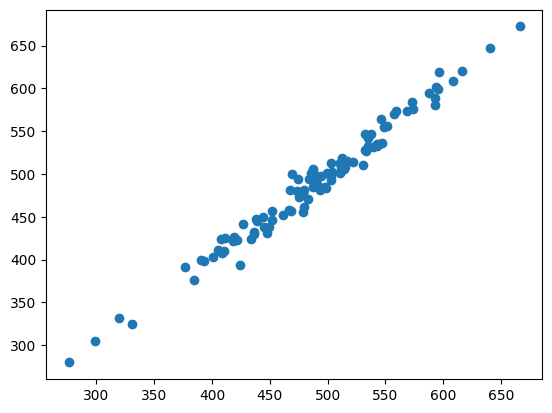

In [20]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

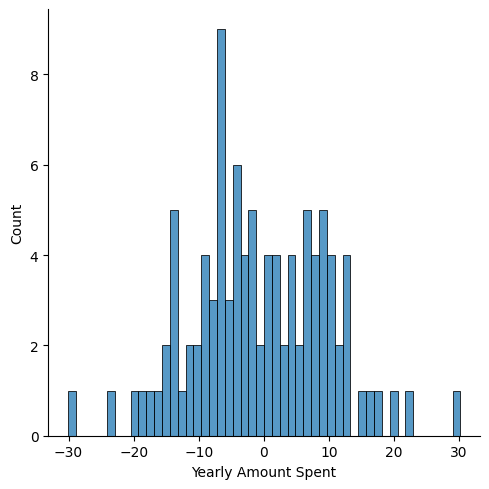

In [21]:
sns.displot((y_test-predictions),bins=50)